In [27]:
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

# 선형회귀분석 모델
import statsmodels.formula.api as smf
# 회귀분석의 정규성 확인: qqplot, add_constant
from statsmodels.api import qqplot, add_constant
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 학습용/평가용 데이터 분리: train/test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가 함수
from sklearn.metrics import r2_score
# 선형 모델
from sklearn.linear_model import Ridge, Lasso, ElasticNet


# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor
# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline

# 한글 폰트 설정 (mac용)
matplotlib.rc("axes", unicode_minus=False)
matplotlib.rcParams["font.family"] = 'AppleGothic'

# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')



In [18]:
df_items = pd.read_csv('./data/on_items.csv', encoding = 'cp949')
df_orders = pd.read_csv('./data/on_orders_.csv', encoding = 'cp949')
df_users = pd.read_csv('./data/on_users.csv', encoding = 'cp949')

In [4]:
df_items.head()

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT
0,U10001,U10001-O2022-1002,06JAN2022:17:08:51,L4-M17-S0530-1024,33310,07JAN2022:06:24:00
1,U10001,U10001-O2022-1002,06JAN2022:17:08:51,L1-M21-S0540-1082,3780,07JAN2022:06:24:00
2,U10001,U10001-O2022-1002,06JAN2022:17:08:51,L1-M15-S0140-1311,22520,07JAN2022:06:24:00
3,U10001,U10001-O2022-1002,06JAN2022:17:08:51,L4-M12-S0350-1035,21630,07JAN2022:06:24:00
4,U10001,U10001-O2022-1003,13JAN2022:16:50:14,L4-M12-S0640-1057,11700,14JAN2022:06:28:00


In [14]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10054 entries, 0 to 10053
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ItemLargeCode   10054 non-null  object
 1   ItemLargeName   10054 non-null  object
 2   ItemMiddleCode  10054 non-null  object
 3   ItemMiddleName  10054 non-null  object
 4   ItemSmallCode   10054 non-null  object
 5   ItemSmallName   10054 non-null  object
 6   ItemCode        10054 non-null  object
 7   ItemName        10054 non-null  object
 8   PriceYear       10054 non-null  int64 
 9   PriceMin        10054 non-null  int64 
 10  PriceMax        10054 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 864.1+ KB


In [15]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855365 entries, 0 to 855364
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   idUser      855365 non-null  object
 1   idOrder     855365 non-null  object
 2   OrderDT     855365 non-null  object
 3   ItemCode    855365 non-null  object
 4   Price       855365 non-null  int64 
 5   DeliveryDT  855365 non-null  object
dtypes: int64(1), object(5)
memory usage: 39.2+ MB


In [16]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   idUser       3000 non-null   object
 1   Gender       3000 non-null   object
 2   Age          3000 non-null   int64 
 3   FamilyCount  3000 non-null   int64 
 4   MemberYN     3000 non-null   object
dtypes: int64(2), object(3)
memory usage: 117.3+ KB


## 이상치 확인

<Axes: xlabel='ItemMiddleName', ylabel='PriceMax'>

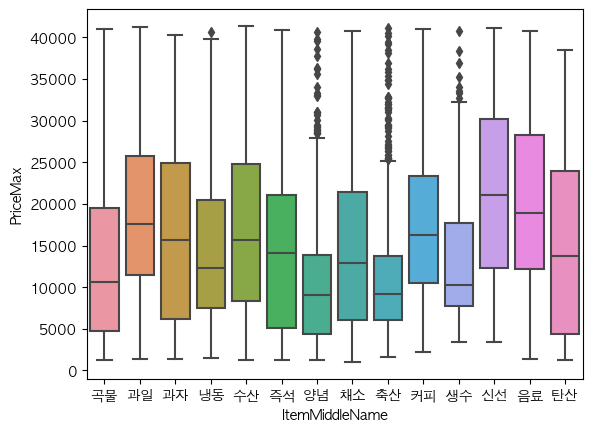

In [24]:
sns.boxplot(x='ItemMiddleName', y='PriceMax', data=df_items)

<Axes: xlabel='ItemMiddleName', ylabel='PriceMin'>

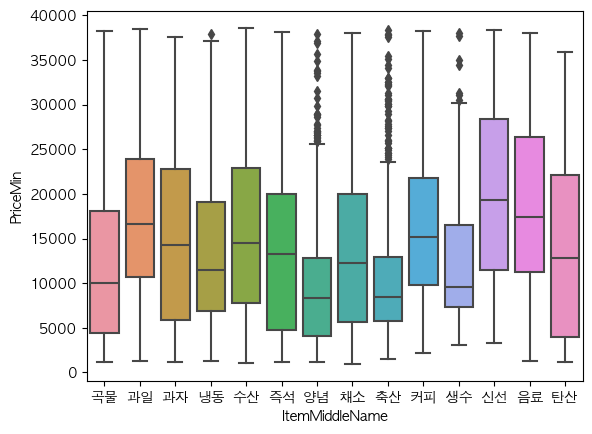

In [ ]:
sns.(x='ItemMiddleName', y='PriceMin', data=df_items)

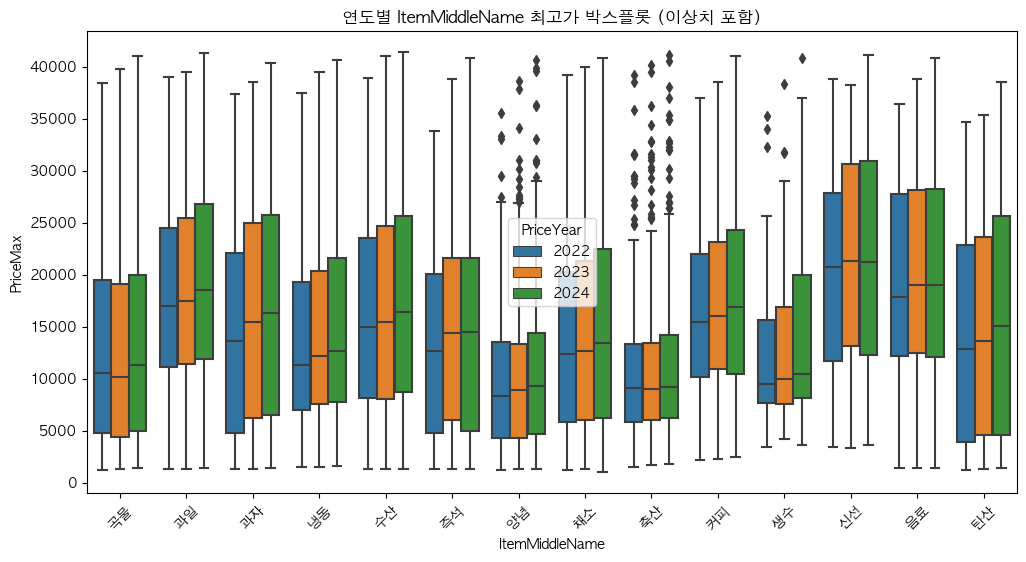

In [27]:
# 연도별 ItemMiddleName 최고가 박스플롯 (이상치 포함)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_items, x='ItemMiddleName', y='PriceMax', hue='PriceYear')
plt.xticks(rotation=45)
plt.title("연도별 ItemMiddleName 최고가 박스플롯 (이상치 포함)")
plt.show()


## 데이터셋 조인

In [19]:
print("df_orders:", df_orders.columns.tolist())
print("df_items:", df_items.columns.tolist())
print("df_users:", df_users.columns.tolist())


df_orders: ['idUser', 'idOrder', 'OrderDT', 'ItemCode', 'Price', 'DeliveryDT']
df_items: ['ItemLargeCode', 'ItemLargeName', 'ItemMiddleCode', 'ItemMiddleName', 'ItemSmallCode', 'ItemSmallName', 'ItemCode', 'ItemName', 'PriceYear', 'PriceMin', 'PriceMax', '이상치?']
df_users: ['idUser', 'Gender', 'Age', 'FamilyCount', 'MemberYN']


In [ ]:
# import pandas as pd

# # 파일 로드
# df_items = pd.read_csv('./data/on_items.csv', encoding='cp949')
# df_orders = pd.read_csv('./data/on_orders_.csv', encoding='cp949')
# df_users = pd.read_csv('./data/on_users.csv', encoding='cp949')

# # 1단계: df_orders와 df_items를 ItemCode 기준으로 outer join
# df_merged = pd.merge(df_orders, df_items, on='ItemCode', how='outer')

# # 2단계: df_merged와 df_users를 idUser 기준으로 outer join
# df_merged = pd.merge(df_merged, df_users, on='idUser', how='outer')

# # 결과 확인
# print(df_merged.shape)
# df_merged.head()


(2302173, 21)


,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,ItemLargeCode,ItemLargeName,ItemMiddleCode,ItemMiddleName,...,ItemSmallName,ItemName,PriceYear,PriceMin,PriceMax,이상치?,Gender,Age,FamilyCount,MemberYN
0,U10001,U10001-O2022-1002,06JAN2022:17:08:51,L4-M17-S0530-1024,33310.0,07JAN2022:06:24:00,L4,신선식품,M17,수산,...,전복,완도 활전복 1kg 중 22-25미,2024,37540.0,40260,NaN,여성,26.0,2.0,Y
1,U10001,U10001-O2022-1002,06JAN2022:17:08:51,L4-M17-S0530-1024,33310.0,07JAN2022:06:24:00,L4,신선식품,M17,수산,...,전복,완도 활전복 1kg 중 22-25미,2023,35660.0,39860,NaN,여성,26.0,2.0,Y
2,U10001,U10001-O2022-1002,06JAN2022:17:08:51,L4-M17-S0530-1024,33310.0,07JAN2022:06:24:00,L4,신선식품,M17,수산,...,전복,완도 활전복 1kg 중 22-25미,2022,33160.0,37070,NaN,여성,26.0,2.0,Y
3,U10001,U10001-O2022-1002,06JAN2022:17:08:51,L1-M21-S0540-1082,3780.0,07JAN2022:06:24:00,L1,가공식품,M21,즉석,...,즉석,동원 양반 차돌된장찌개 (460G),2024,4320.0,4640,NaN,여성,26.0,2.0,Y
4,U10001,U10001-O2022-1002,06JAN2022:17:08:51,L1-M21-S0540-1082,3780.0,07JAN2022:06:24:00,L1,가공식품,M21,즉석,...,즉석,동원 양반 차돌된장찌개 (460G),2023,3970.0,4270,NaN,여성,26.0,2.0,Y


In [20]:
# 주문일자 → 날짜형 변환
df_orders['OrderDT'] = pd.to_datetime(df_orders['OrderDT'], format='%d%b%Y:%H:%M:%S')

# 연도 컬럼 추가
df_orders['Year'] = df_orders['OrderDT'].dt.year


In [21]:
# 예시: 연도 목록 추출
years = df_orders['Year'].unique()

# 연도별 병합된 데이터셋 저장용 딕셔너리
yearly_dfs = {}

for year in years:
    df_orders_y = df_orders[df_orders['Year'] == year]
    
    # step1: 주문 + 상품
    merged_y = pd.merge(df_orders_y, df_items, on='ItemCode', how='left')
    
    # step2: + 고객
    merged_y = pd.merge(merged_y, df_users, on='idUser', how='left')
    
    # 저장
    yearly_dfs[year] = merged_y


In [22]:
# 2022년도 데이터 불러오기
df_2022 = yearly_dfs[2022]

# 2023년도 평균 주문 금액
avg_2023_price = yearly_dfs[2023]['Price'].mean()


In [23]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614374 entries, 0 to 614373
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   idUser          614374 non-null  object        
 1   idOrder         614374 non-null  object        
 2   OrderDT         614374 non-null  datetime64[ns]
 3   ItemCode        614374 non-null  object        
 4   Price           614374 non-null  int64         
 5   DeliveryDT      614374 non-null  object        
 6   Year            614374 non-null  int32         
 7   ItemLargeCode   614374 non-null  object        
 8   ItemLargeName   614374 non-null  object        
 9   ItemMiddleCode  614374 non-null  object        
 10  ItemMiddleName  614374 non-null  object        
 11  ItemSmallCode   614374 non-null  object        
 12  ItemSmallName   614374 non-null  object        
 13  ItemName        614374 non-null  object        
 14  PriceYear       614374 non-null  int

In [10]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302173 entries, 0 to 2302172
Data columns (total 21 columns):
 #   Column          Dtype  
---  ------          -----  
 0   idUser          object 
 1   idOrder         object 
 2   OrderDT         object 
 3   ItemCode        object 
 4   Price           float64
 5   DeliveryDT      object 
 6   ItemLargeCode   object 
 7   ItemLargeName   object 
 8   ItemMiddleCode  object 
 9   ItemMiddleName  object 
 10  ItemSmallCode   object 
 11  ItemSmallName   object 
 12  ItemName        object 
 13  PriceYear       int64  
 14  PriceMin        float64
 15  PriceMax        int64  
 16  이상치?            object 
 17  Gender          object 
 18  Age             float64
 19  FamilyCount     float64
 20  MemberYN        object 
dtypes: float64(4), int64(2), object(15)
memory usage: 368.8+ MB


In [ ]:
df_merged.isnull().sum()
# 가입만 해두고 한 번도 주문 안 한 회원 3명?

idUser                  3
idOrder                 3
OrderDT                 3
ItemCode                0
Price                   3
DeliveryDT              3
ItemLargeCode           0
ItemLargeName           0
ItemMiddleCode          0
ItemMiddleName          0
ItemSmallCode           0
ItemSmallName           0
ItemName                0
PriceYear               0
PriceMin               88
PriceMax                0
이상치?              2301938
Gender                  3
Age                     3
FamilyCount             3
MemberYN                3
dtype: int64

In [16]:
df_merged = df_merged.drop(['ItemLargeCode', 'ItemMiddleCode','ItemSmallCode', '이상치?'], axis=1)

In [17]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302173 entries, 0 to 2302172
Data columns (total 17 columns):
 #   Column          Dtype  
---  ------          -----  
 0   idUser          object 
 1   idOrder         object 
 2   OrderDT         object 
 3   ItemCode        object 
 4   Price           float64
 5   DeliveryDT      object 
 6   ItemLargeName   object 
 7   ItemMiddleName  object 
 8   ItemSmallName   object 
 9   ItemName        object 
 10  PriceYear       int64  
 11  PriceMin        float64
 12  PriceMax        int64  
 13  Gender          object 
 14  Age             float64
 15  FamilyCount     float64
 16  MemberYN        object 
dtypes: float64(4), int64(2), object(11)
memory usage: 298.6+ MB


In [ ]:
df_merged.info()

## 시계열 분석

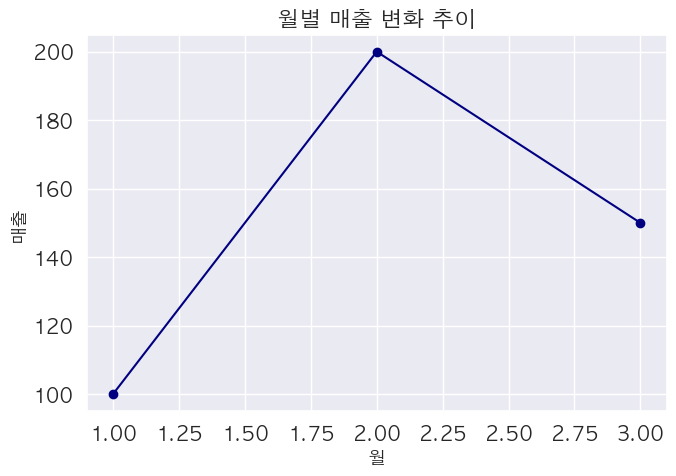

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ✅ 한글 폰트 수동 설정 (폰트 경로 바꿔도 됨)
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'  # Mac의 기본 한글 폰트
font_prop = fm.FontProperties(fname=font_path)

# 데이터 준비 예시
x = [1, 2, 3]
y = [100, 200, 150]

# ✅ 그래프 그리기 (matplotlib 기본 스타일)
plt.figure(figsize=(7, 5))
plt.plot(x, y, marker='o', color='navy')

# ✅ 한글 텍스트 전부에 fontproperties 적용
plt.title("월별 매출 변화 추이", fontproperties=font_prop, fontsize=16)
plt.xlabel("월", fontproperties=font_prop, fontsize=13)
plt.ylabel("매출", fontproperties=font_prop, fontsize=13)

# ✅ 눈금(label)에도 한글 폰트 적용
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)

plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
# 데이터 불러오기
df = pd.read_csv('./data/df_clean.csv')

df['OrderDT'] = pd.to_datetime(df['OrderDT'])


In [18]:
import pandas as pd

# 열 개수 무제한 설정
pd.set_option('display.max_columns', None)

# 터미널 너비에 맞게 자동 조정
pd.set_option('display.width', None)

# (선택) 긴 문자열 자르지 않기
pd.set_option('display.max_colwidth', None)

# (추가) info 출력 대신 columns 리스트로 확인
print(df.columns.tolist())


['idUser', 'Gender', 'Age', 'AgeGroup', 'FamilyCount', 'MemberYN', 'idOrder', 'OrderDT', 'OrderMonth', 'OrderDay', 'OrderHour', 'OrderMinute', 'OrderSecond', 'ItemCode', 'ItemLargeName', 'ItemMiddleName', 'ItemSmallName', 'ItemName', 'Price', 'PriceYear', 'PriceMin', 'PriceMax', 'DeliveryDT', 'Deli_Year', 'Deli_Month', 'Deli_Day', 'Deli_Hour', 'Deli_Minute', 'Deli_Second', 'Deli_Duration', 'Deli_Hours', 'IsMorningDelivery']


In [22]:
# 직접 모든 열 정보 출력하기
for col in df.columns:
    print(f"{col:25} | {df[col].notnull().sum():>7} non-null | {df[col].dtype}")


idUser                    |  856727 non-null | object
Gender                    |  856727 non-null | object
Age                       |  856727 non-null | int64
AgeGroup                  |  856727 non-null | object
FamilyCount               |  856727 non-null | int64
MemberYN                  |  856727 non-null | object
idOrder                   |  856727 non-null | object
OrderDT                   |  856727 non-null | datetime64[ns]
OrderMonth                |  856727 non-null | int64
OrderDay                  |  856727 non-null | int64
OrderHour                 |  856727 non-null | int64
OrderMinute               |  856727 non-null | int64
OrderSecond               |  856727 non-null | int64
ItemCode                  |  856727 non-null | object
ItemLargeName             |  856727 non-null | object
ItemMiddleName            |  856727 non-null | object
ItemSmallName             |  856727 non-null | object
ItemName                  |  856727 non-null | object
Price                     |

In [23]:
df.columns

Index(['idUser', 'Gender', 'Age', 'AgeGroup', 'FamilyCount', 'MemberYN',
       'idOrder', 'OrderDT', 'OrderMonth', 'OrderDay', 'OrderHour',
       'OrderMinute', 'OrderSecond', 'ItemCode', 'ItemLargeName',
       'ItemMiddleName', 'ItemSmallName', 'ItemName', 'Price', 'PriceYear',
       'PriceMin', 'PriceMax', 'DeliveryDT', 'Deli_Year', 'Deli_Month',
       'Deli_Day', 'Deli_Hour', 'Deli_Minute', 'Deli_Second', 'Deli_Duration',
       'Deli_Hours', 'IsMorningDelivery'],
      dtype='object')

In [21]:
df.describe(include='all')

,idUser,Gender,Age,AgeGroup,FamilyCount,MemberYN,idOrder,OrderDT,OrderMonth,OrderDay,OrderHour,OrderMinute,OrderSecond,ItemCode,ItemLargeName,ItemMiddleName,ItemSmallName,ItemName,Price,PriceYear,PriceMin,PriceMax,DeliveryDT,Deli_Year,Deli_Month,Deli_Day,Deli_Hour,Deli_Minute,Deli_Second,Deli_Duration,Deli_Hours,IsMorningDelivery
count,856727,856727,856727.000000,856727,856727.000000,856727,856727,856727,856727.000000,856727.000000,856727.000000,856727.000000,856727.000000,856727,856727,856727,856727,856727,856727.000000,856727.000000,856727.000000,856727.000000,856727,856727.000000,856727.000000,856727.000000,856727.000000,856727.000000,856727.0,856727,856727.000000,856727.000000
unique,3000,2,NaN,5,NaN,2,171431,NaN,NaN,NaN,NaN,NaN,NaN,3973,4,14,59,3988,NaN,NaN,NaN,NaN,106844,NaN,NaN,NaN,NaN,NaN,NaN,2633,NaN,NaN
top,U10642,여성,NaN,30대,NaN,Y,U10642-O2024-1006,NaN,NaN,NaN,NaN,NaN,NaN,L1-M11-S0220-1030,가공식품,과일,냉동,농심 신라면 120g 10개 + 얼큰한 너구리 120g 5개 + 올리브 짜파게티 140g,NaN,NaN,NaN,NaN,2024-12-09 05:37:00,NaN,NaN,NaN,NaN,NaN,NaN,0 days 10:02:00,NaN,NaN
freq,479,517979,NaN,363387,NaN,614152,20,NaN,NaN,NaN,NaN,NaN,NaN,1097,428807,179049,64469,1097,NaN,NaN,NaN,NaN,64,NaN,NaN,NaN,NaN,NaN,NaN,1567,NaN,NaN
mean,NaN,NaN,36.799389,NaN,1.622516,NaN,NaN,2023-09-04 20:48:01.145616128,6.507997,15.780875,15.662171,29.443211,29.506264,NaN,NaN,NaN,NaN,NaN,15416.669172,2023.176250,15121.631803,16233.510395,NaN,2023.178165,6.526705,15.688103,4.959388,34.493609,0.0,NaN,17.591413,0.846037
min,NaN,NaN,21.000000,NaN,0.000000,NaN,NaN,2022-01-02 19:43:00,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,960.000000,2022.000000,960.000000,1020.000000,NaN,2022.000000,1.000000,1.000000,3.000000,10.000000,0.0,NaN,5.200000,0.000000
25%,NaN,NaN,29.000000,NaN,1.000000,NaN,NaN,2023-01-01 13:41:00,4.000000,8.000000,12.000000,14.000000,15.000000,NaN,NaN,NaN,NaN,NaN,7400.000000,2023.000000,7250.000000,7770.000000,NaN,2023.000000,4.000000,8.000000,4.000000,22.000000,0.0,NaN,10.966667,1.000000
50%,NaN,NaN,35.000000,NaN,2.000000,NaN,NaN,2023-10-11 18:54:00,7.000000,16.000000,17.000000,29.000000,30.000000,NaN,NaN,NaN,NaN,NaN,13920.000000,2023.000000,13660.000000,14660.000000,NaN,2023.000000,7.000000,16.000000,5.000000,34.000000,0.0,NaN,14.966667,1.000000
75%,NaN,NaN,43.000000,NaN,2.000000,NaN,NaN,2024-05-30 17:36:00,10.000000,23.000000,20.000000,44.000000,44.000000,NaN,NaN,NaN,NaN,NaN,22300.000000,2024.000000,21890.000000,23540.000000,NaN,2024.000000,10.000000,23.000000,6.000000,47.000000,0.0,NaN,21.033333,1.000000
max,NaN,NaN,69.000000,NaN,3.000000,NaN,NaN,2024-12-29 23:57:00,12.000000,31.000000,23.000000,59.000000,59.000000,NaN,NaN,NaN,NaN,NaN,41310.000000,2024.000000,38590.000000,41390.000000,NaN,2024.000000,12.000000,31.000000,7.000000,59.000000,0.0,NaN,58.783333,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856727 entries, 0 to 856726
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   idUser             856727 non-null  object        
 1   Gender             856727 non-null  object        
 2   Age                856727 non-null  int64         
 3   AgeGroup           856727 non-null  object        
 4   FamilyCount        856727 non-null  int64         
 5   MemberYN           856727 non-null  object        
 6   idOrder            856727 non-null  object        
 7   OrderDT            856727 non-null  datetime64[ns]
 8   OrderMonth         856727 non-null  int64         
 9   OrderDay           856727 non-null  int64         
 10  OrderHour          856727 non-null  int64         
 11  OrderMinute        856727 non-null  int64         
 12  OrderSecond        856727 non-null  int64         
 13  ItemCode           856727 non-null  object  

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


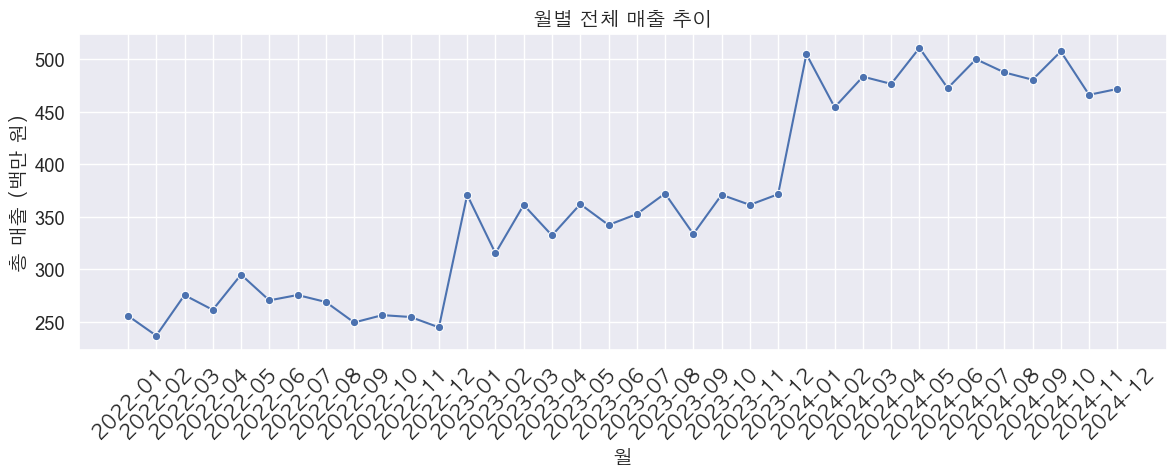

NameError: name 'weekly_sales' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as fm
import seaborn as sns

# 한글 폰트 설정 (Mac 기준)
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

# 스타일 설정
plt.style.use('ggplot')
sns.set(font_scale=1.2)

# 날짜 기반 파생 변수 생성
df['year_month'] = df['OrderDT'].dt.to_period('M').astype(str)
df['year_week'] = df['OrderDT'].dt.strftime('%Y-%U')
df['weekday'] = df['OrderDT'].dt.day_name()

# 연령대 그룹 생성
df['age_group'] = pd.cut(df['Age'],
                         bins=[10, 20, 30, 40, 50, 60, 100],
                         labels=['10대', '20대', '30대', '40대', '50대', '60대+'])

# -------------------------------
# 월별 전체 매출 (백만 원 단위 변환)
monthly_sales = df.groupby('year_month')['Price'].sum().reset_index()
monthly_sales['Price_million'] = monthly_sales['Price'] / 1e6


plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x='year_month', y='Price_million', marker='o')
plt.title('월별 전체 매출 추이', fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.ylabel('총 매출 (백만 원)', fontproperties=font_prop)
plt.xlabel('월', fontproperties=font_prop)
plt.tight_layout()
plt.show()

# -------------------------------
# 주차별 전체 매출 (백만 원 단위 변환)
# x축 레이블 줄이기: 4주 단위 표시
xticks = weekly_sales['year_week'].tolist()[::4]  # 4주 간격으로 추출
# 주차별 대표 날짜 컬럼 생성
weekly_sales['week_start'] = pd.to_datetime(weekly_sales['year_week'] + '-1', format='%Y-%U-%w')

# 4주 간격으로만 눈금 표시
xticks = weekly_sales['week_start'][::4]
xtick_labels = weekly_sales['week_start'][::4].dt.strftime('%m/%d')  # 또는 '%Y-%m-%d'도 가능

plt.figure(figsize=(14, 5))
sns.lineplot(data=weekly_sales, x='week_start', y='Price_million', marker='o')

plt.title('주차별 전체 매출 추이', fontproperties=font_prop)
plt.xticks(ticks=xticks, labels=xtick_labels, rotation=45, fontproperties=font_prop)
plt.ylabel('총 매출 (백만 원)', fontproperties=font_prop)
plt.xlabel('주 시작일 (월/일)', fontproperties=font_prop)
plt.tight_layout()
plt.show()



# -------------------------------
# 연령대별 월별 매출 (백만 원 단위 변환)
age_monthly_sales = df.groupby(['year_month', 'age_group'])['Price'].sum().reset_index()
age_monthly_sales['Price_million'] = age_monthly_sales['Price'] / 1e6

plt.figure(figsize=(14, 6))
sns.lineplot(data=age_monthly_sales, x='year_month', y='Price_million', hue='age_group', marker='o')
plt.title('연령대별 월별 매출 추이', fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.ylabel('총 매출 (백만 원)', fontproperties=font_prop)
plt.xlabel('월', fontproperties=font_prop)
plt.legend(title='연령대', prop=font_prop)
plt.tight_layout()
plt.show()


## 카테고리별 매출분석(신선식품/가공식품)

In [36]:
# 월 + 카테고리별 매출 집계
category_monthly_sales = df.groupby(['year_month', 'ItemLargeName'])['Price'].sum().reset_index()

# 백만 원 단위로 변환
category_monthly_sales['Price_million'] = category_monthly_sales['Price'] / 1e6


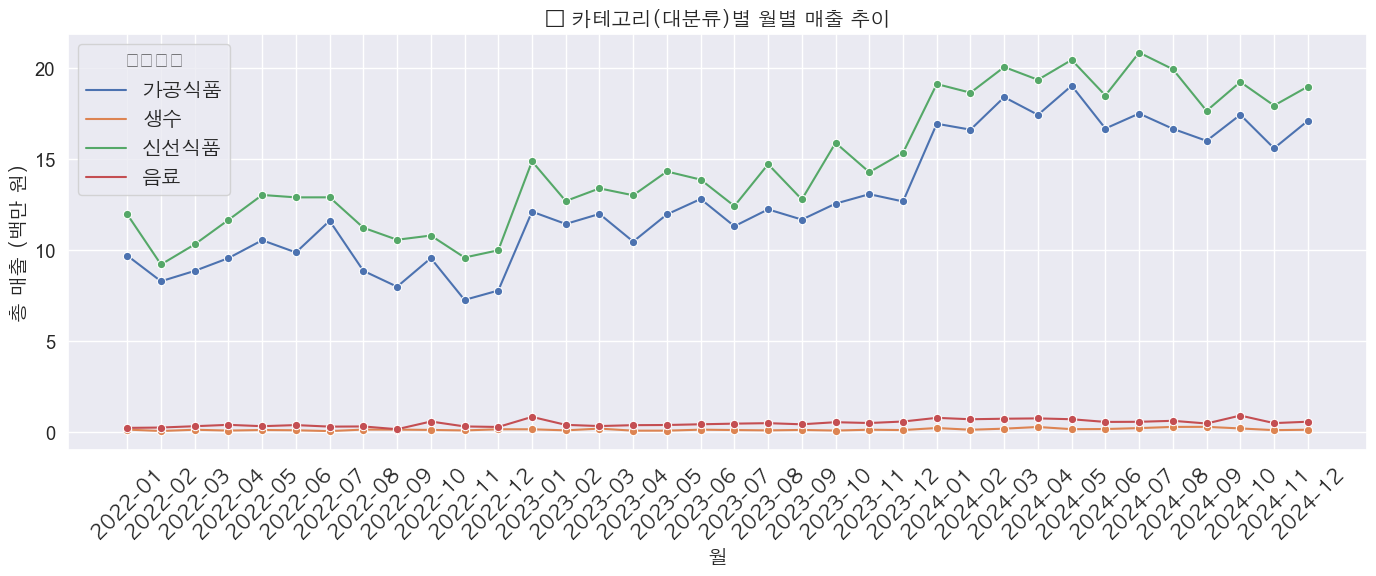

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.lineplot(data=category_monthly_sales, x='year_month', y='Price_million',
             hue='ItemLargeName', marker='o')

plt.title('📦 카테고리(대분류)별 월별 매출 추이', fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.ylabel('총 매출 (백만 원)', fontproperties=font_prop)
plt.xlabel('월', fontproperties=font_prop)
plt.legend(title='카테고리', prop=font_prop)
plt.tight_layout()
plt.show()


In [38]:
# 특정 월에 어떤 카테고리가 매출이 줄었는지
category_monthly_sales[category_monthly_sales['year_month'] == '2023-12']\
    .sort_values(by='Price_million', ascending=False)


,year_month,ItemLargeName,Price,Price_million
94,2023-12,신선식품,15342940,15.34294
92,2023-12,가공식품,12665870,12.66587
95,2023-12,음료,565350,0.56535
93,2023-12,생수,96570,0.09657


## 소비 트렌드 비교: 전체 고객 기준 중분류 상위 5개 품목의 월별 매출 추이

In [39]:
# 월 + 중분류별 매출 집계
middle_monthly_sales = df.groupby(['year_month', 'ItemMiddleName'])['Price'].sum().reset_index()
middle_monthly_sales['Price_million'] = middle_monthly_sales['Price'] / 1e6


In [40]:
# 전체 중분류별 총 매출 계산 → 상위 5개 선정
top_middle = df.groupby('ItemMiddleName')['Price'].sum().nlargest(5).index.tolist()

# 상위 5개 중분류만 필터링
middle_monthly_top5 = middle_monthly_sales[middle_monthly_sales['ItemMiddleName'].isin(top_middle)]


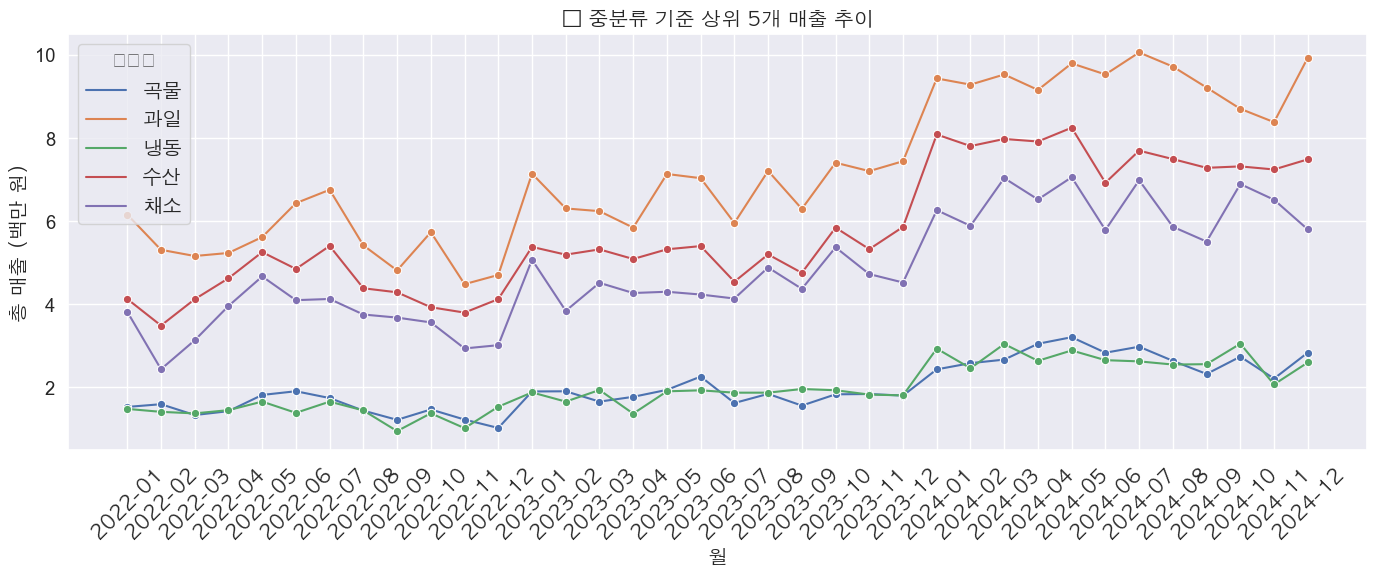

In [41]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=middle_monthly_top5, x='year_month', y='Price_million',
             hue='ItemMiddleName', marker='o')

plt.title('🍱 중분류 기준 상위 5개 매출 추이', fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.ylabel('총 매출 (백만 원)', fontproperties=font_prop)
plt.xlabel('월', fontproperties=font_prop)
plt.legend(title='중분류', prop=font_prop)
plt.tight_layout()
plt.show()


### 전체 고객 기준 중분류 매출 추이 

1위: 과일
압도적 1위 유지, 명절(1월, 2월, 12월)에 급등하는 명확한 시즌성

4060뿐 아니라 전체 고객도 과일에 큰 소비 집중

2024년 1월 매출 10억 원 돌파 → 사전 예약, 선물세트 타겟 유력

2위: 수산
신선 카테고리로써 꾸준히 인기

겨울에 소폭 상승 → 국물요리 시즌 영향 가능

4060과 트렌드 유사

3위: 채소
4060보다 전체 고객에서 매출이 더 높음

젊은층까지 포함되어 샐러드, 건강식 트렌드 반영

2023~2024년 채소 매출 안정적 상승 → 헬시푸드 전략 강화 가능

4위: 냉동
4060에서는 낮은 순위였는데, 전체에서는 과일/수산/채소 다음 수준

젊은층의 HMR(가정간편식) 수요 반영?

2024년 초 상승세 → 캠페인 또는 제품군 확장 효과

5위: 곡물
다른 품목에 비해 가장 완만한 상승 곡선

꾸준히 사는 식재료이기 때문에 프로모션 반응은 약하지만 LTV가 높은 품목



활용 아이디어
냉동 상품군을 4060 타겟으로 확장해볼 수 있음

“4060을 위한 간편식”, “건강한 냉동밥상” 캠페인 등

과일/수산은 명절 시점 집중 광고 필요

특히 12월~2월: 사전예약, 선물 패키지, 재구매 리마인드 전략

곡물·채소는 LTV 기반 정기배송 유도

자동 결제, 단골 유치용 프로모션 적합

## 4060 고객 대상 중분류별 매출 분석

In [42]:
# 4060 고객군 필터
df_4060 = df[df['age_group'].isin(['40대', '50대', '60대+'])]


In [43]:
middle_4060_sales = df_4060.groupby(['year_month', 'ItemMiddleName'])['Price'].sum().reset_index()
middle_4060_sales['Price_million'] = middle_4060_sales['Price'] / 1e6

# 상위 중분류 5개 추출
top_middle_4060 = df_4060.groupby('ItemMiddleName')['Price'].sum().nlargest(5).index.tolist()
middle_4060_top5 = middle_4060_sales[middle_4060_sales['ItemMiddleName'].isin(top_middle_4060)]


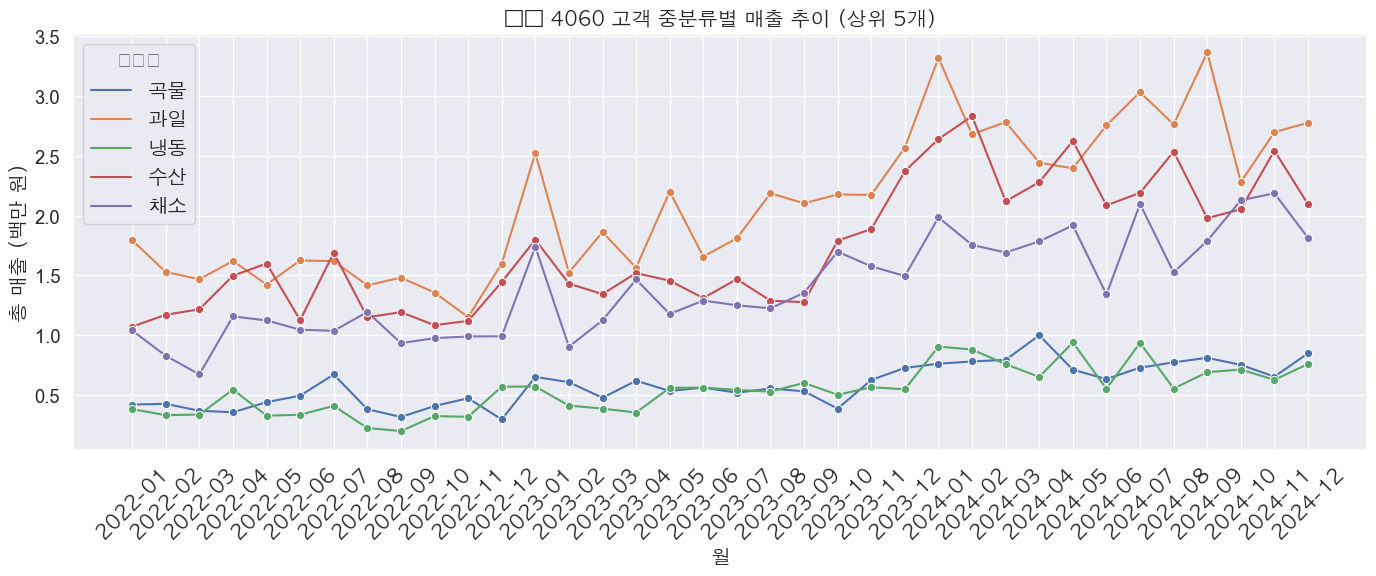

In [44]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=middle_4060_top5, x='year_month', y='Price_million',
             hue='ItemMiddleName', marker='o')

plt.title('👵🧓 4060 고객 중분류별 매출 추이 (상위 5개)', fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.ylabel('총 매출 (백만 원)', fontproperties=font_prop)
plt.xlabel('월', fontproperties=font_prop)
plt.legend(title='중분류', prop=font_prop)
plt.tight_layout()
plt.show()


### 4060 고객이 선호하는 중분류

1위: 과일
압도적인 1위, 다른 품목과 격차 큼

2023년 12월, 2024년 1월에 급등: 설/명절 영향 가능성

시즌성 강함 → 제철, 명절 과일세트 등에 민감한 반응

2위: 수산
연중 안정적으로 높고, 겨울철 상승세가 뚜렷

12~2월 강세: 김장, 국물요리 등 겨울철 소비 영향

신선도, 배송 신뢰감이 중요 → 신뢰 기반 브랜드 전략 필요

3위: 채소
점진적으로 우상향: 꾸준히 늘어나는 구매

1인가구보다는 가정식 기반 2인 이상 구성에 적합

헬시푸드 트렌드에 반응 가능성도 있음

4위: 냉동
다른 품목에 비해 매출은 낮지만, 2024년부터 소폭 증가 추세

편의성, 식재료 대체 용도로 선호

4060도 간편식 소비에 서서히 익숙해지고 있음

5위: 곡물
4060의 기본 식재료: 쌀, 잡곡, 시리얼 등

매출은 낮지만 꾸준함이 강점

정기배송/묶음배송 전략과 잘 어울림

## 연령대 × 중분류 매출 히트맵 분석

In [45]:
# 연령대 × 중분류별 매출 합계 계산
age_middle_sales = df.groupby(['age_group', 'ItemMiddleName'])['Price'].sum().reset_index()

# 백만 원 단위로 변환
age_middle_sales['Price_million'] = age_middle_sales['Price'] / 1e6


In [46]:
# 연령대: index, 중분류: columns, 값: 매출
pivot_table = age_middle_sales.pivot(index='age_group', columns='ItemMiddleName', values='Price_million')

# 결측값 0으로 대체 (구매 없었던 경우)
pivot_table = pivot_table.fillna(0)


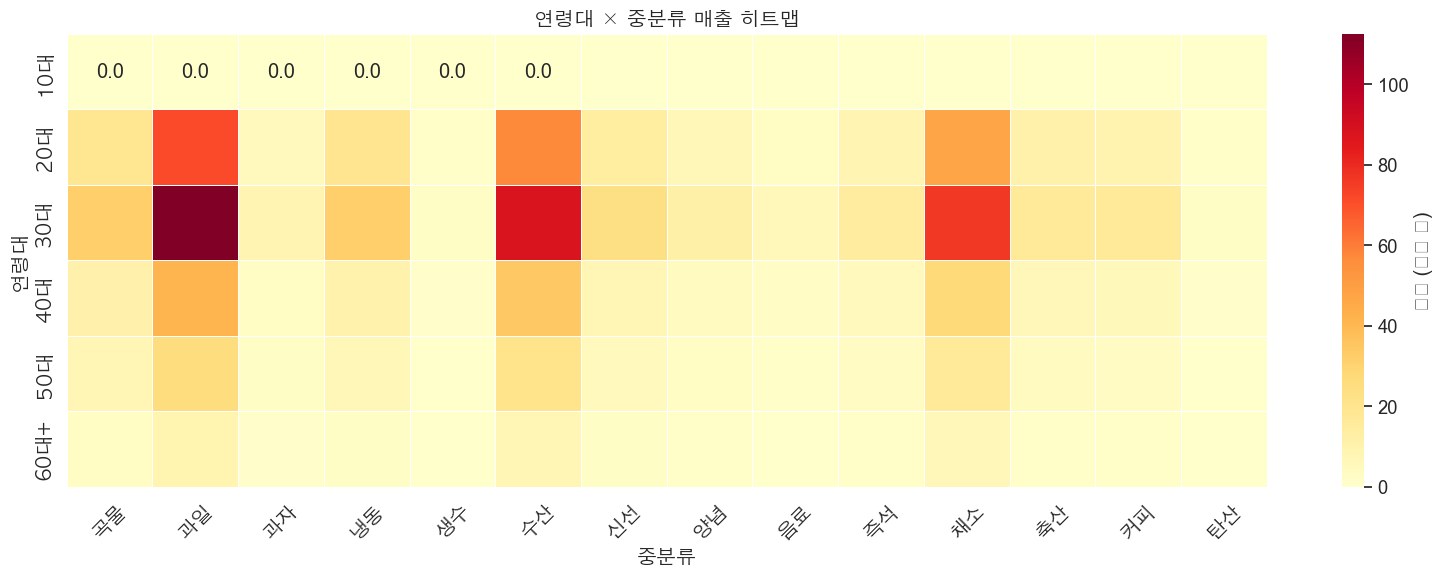

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlOrRd", linewidths=0.5, cbar_kws={'label': '매출 (백만 원)'})

plt.title("연령대 × 중분류 매출 히트맵", fontproperties=font_prop)
plt.xlabel("중분류", fontproperties=font_prop)
plt.ylabel("연령대", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.tight_layout()
plt.show()


## 4060 vs 2030 연령대별 객단가(AOV) 비교

In [48]:
# 주문 단위로 총 금액, 고객 정보 추출
order_level = df.groupby('idOrder').agg(
    total_price=('Price', 'sum'),
    idUser=('idUser', 'first'),
    age=('Age', 'first'),
    age_group=('age_group', 'first')
).reset_index()


In [49]:
# 2030 그룹
young = order_level[order_level['age_group'].isin(['20대', '30대'])]
# 4060 그룹
senior = order_level[order_level['age_group'].isin(['40대', '50대', '60대+'])]


In [50]:
print("🧑‍🎓 2030 객단가 (평균 주문 금액):", round(young['total_price'].mean(), 2), "원")
print("🧓 4060 객단가 (평균 주문 금액):", round(senior['total_price'].mean(), 2), "원")


🧑‍🎓 2030 객단가 (평균 주문 금액): 76986.48 원
🧓 4060 객단가 (평균 주문 금액): 77416.8 원


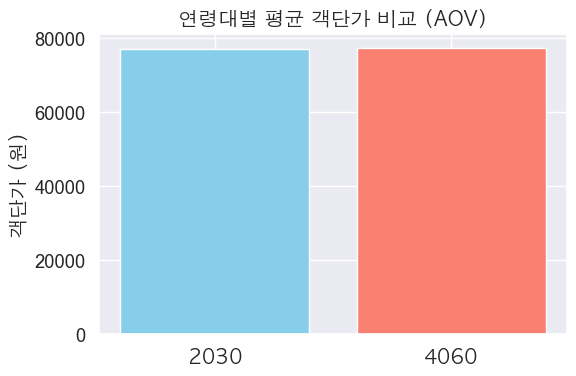

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(['2030', '4060'], [young['total_price'].mean(), senior['total_price'].mean()], color=['skyblue', 'salmon'])

plt.title('연령대별 평균 객단가 비교 (AOV)', fontproperties=font_prop)
plt.ylabel('객단가 (원)', fontproperties=font_prop)
plt.xticks(fontproperties=font_prop)
plt.tight_layout()
plt.show()


해석 1: "4060 고객 = 숨은 고가 소비자"

주문 횟수나 고객 수는 적지만

한 번 주문할 때 장바구니 금액이 크다

**고객당 가치(LTV)**가 높을 가능성 있음

해석 2: "2030 고객 = 빈번한 소비자"
주문 수는 많지만 1회 결제 금액은 4060과 비슷

젊은 층은 카테고리 다양성 + 경험 소비

빈도 중심, 이탈 방지 전략 필요


고객 수는 적은데 객단가가 비슷하다는 건,
4060 고객 유입만 잘 시켜도 곧바로 매출이 오른다는 뜻




## 고객 세분화 & 추천 시스템 기반 분석

### RFM 기반 고객 클러스터링

In [57]:
# 주문 단위 RFM 데이터 생성
rfm_df = df.groupby('idUser').agg(
    Recency=('OrderDT', lambda x: (df['OrderDT'].max() - x.max()).days),
    Frequency=('idOrder', pd.Series.nunique),
    Monetary=('Price', 'sum'),
    Age=('Age', 'first'),
    Gender=('Gender', 'first')
).reset_index()


#### 클러스터링 모델 적용 (KMeans 등)

In [63]:
from sklearn.preprocessing import StandardScaler\
# from sklearn.cluster import KMeans

# RFM만 스케일링
X = rfm_df[['Recency', 'Frequency', 'Monetary']]
X_scaled = StandardScaler().fit_transform(X)

# k=4 클러스터로 나눔
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(X_scaled)

cluster_map = {
    1: 'VIP 고객',
    0: '충성 고객',
    2: '일반 고객',
    3: '이탈 고객'
}

rfm_df['고객유형'] = rfm_df['Cluster'].map(cluster_map)



In [64]:
# 각 그룹 평균 비교
cluster_summary = rfm_df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
print(cluster_summary)


            Recency  Frequency      Monetary
Cluster                                     
0         18.125000  58.038462  4.355447e+06
1         12.080000  70.946667  5.560127e+06
2         14.395833  36.250000  2.920139e+06
3        509.000000  42.000000  3.026140e+06


## 고객유형 정보를 **기존 주문 데이터프레임(df)**에 매핑

In [65]:
# 사용자 ID와 고객유형만 추출
user_segments = rfm_df[['idUser', '고객유형']]

# 기존 df에 병합
df = df.merge(user_segments, on='idUser', how='left')



In [66]:
df.head()

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Gender,Age,FamilyCount,MemberYN,...,ItemSmallName,ItemName,PriceYear,PriceMin,PriceMax,year_month,year_week,weekday,age_group,고객유형
0,U10001,U10001-O2022-1002,2022-01-06 17:08:51,L4-M17-S0530-1024,33310,07JAN2022:06:24:00,여성,26,2,Y,...,전복,완도 활전복 1kg 중 22-25미,2022,33160,37070,2022-01,2022-01,Thursday,20대,VIP 고객
1,U10001,U10001-O2022-1002,2022-01-06 17:08:51,L1-M21-S0540-1082,3780,07JAN2022:06:24:00,여성,26,2,Y,...,즉석,동원 양반 차돌된장찌개 (460G),2022,3690,3970,2022-01,2022-01,Thursday,20대,VIP 고객
2,U10001,U10001-O2022-1002,2022-01-06 17:08:51,L1-M15-S0140-1311,22520,07JAN2022:06:24:00,여성,26,2,Y,...,냉동,오뚜기 듬뿍 새우볶음밥450g (2인분) x 5봉지 /,2022,22150,23150,2022-01,2022-01,Thursday,20대,VIP 고객
3,U10001,U10001-O2022-1002,2022-01-06 17:08:51,L4-M12-S0350-1035,21630,07JAN2022:06:24:00,여성,26,2,Y,...,사과,[산지직송] 새콤달콤 부사 사과 5kg (13과내),2022,20810,23030,2022-01,2022-01,Thursday,20대,VIP 고객
4,U10001,U10001-O2022-1003,2022-01-13 16:50:14,L4-M12-S0640-1057,11700,14JAN2022:06:28:00,여성,26,2,Y,...,토마토,스테비아 방울 토마토 라루 토망고 1kg,2022,11640,13020,2022-01,2022-02,Thursday,20대,VIP 고객


## 고객유형별 장바구니 분석

In [70]:
pip install mlxtend

19826.71s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 44.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2

[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [71]:
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# 고객유형별 장바구니 분석
vip_orders = df[df['고객유형'] == 'VIP 고객']

# 주문 단위로 아이템 리스트 추출
basket_data = vip_orders.groupby('idOrder')['ItemSmallName'].unique().tolist()

# 리스트를 One-hot 인코딩
te = TransactionEncoder()
te_ary = te.fit(basket_data).transform(basket_data)
df_basket = pd.DataFrame(te_ary, columns=te.columns_)

# 빈발 항목 집합 찾기
frequent_items = apriori(df_basket, min_support=0.05, use_colnames=True)

# 연관규칙 생성
rules = association_rules(frequent_items, metric="lift", min_threshold=1.0)

# 결과 예시 보기
rules.sort_values(by='confidence', ascending=False).head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(고구마),(냉동),0.220071,0.326630,0.076114,0.345858,1.058867,1.0,0.004232,1.029394,0.071282,0.161741,0.028555,0.289442
2,(사과),(냉동),0.268934,0.326630,0.090772,0.337526,1.033358,1.0,0.002930,1.016447,0.044157,0.179821,0.016181,0.307716
3,(냉동),(사과),0.326630,0.268934,0.090772,0.277906,1.033358,1.0,0.002930,1.012424,0.047940,0.179821,0.012271,0.307716
1,(냉동),(고구마),0.326630,0.220071,0.076114,0.233026,1.058867,1.0,0.004232,1.016891,0.082562,0.161741,0.016611,0.289442
